# Blue book for Bulldozers
Supervised regression - Jupyter Notebook of a regression problem, using data from a Kaggle competition: https://www.kaggle.com/c/bluebook-for-bulldozers.

## 1. Problem definition
Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers, given its characteristics.

## 2. Data
Data taken from kaggle: https://www.kaggle.com/c/bluebook-for-bulldozers

The data is split into three parts: The data for this competition is split into three parts:

* **Train.csv** is the training set, which contains data through the end of 2011
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012
* **Test.csv** is the test set, which contains data from May 1, 2012 - November 2012

## 3. Evaluation
RMSLE (root mean squared log error) between the actual and predicted auction prices.

More information on the evaluation are reported here: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

*Note: the goal for regression evaluation metrics is to minimize the error.*

## 4. Features
Kaggle provides a dictionary detailling all the features of the dataset. It can be viewed here: https://docs.google.com/spreadsheets/d/1AEiEmW5CF-NTadWQ3ybghCxUYPXT5SxVCZ7gFhxZk5Y/edit#gid=0

## 5. Modelling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load train and validation set together, specifing the column containing the date (time series)
df = pd.read_csv("../Data/bluebook-for-bulldozers/TrainAndValid.csv", 
                 low_memory=False, 
                 parse_dates=["saledate"])

### 5.1 Exploratory data analysis
#### 5.1.1 Get more information about the data

In [4]:
df.shape

(412698, 53)

In [5]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [7]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03
max,6.333349e+06,142000.000000,2.486330e+06,37198.000000,173.000000,99.000000,2014.000000,2.483300e+06


#### 5.1.2 Check for missing values¶


In [8]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

Missing value present in the df, they will need to be process before modelling

#### 5.1.3 Finding trends in the data

*Visualise Sale Price distribution*

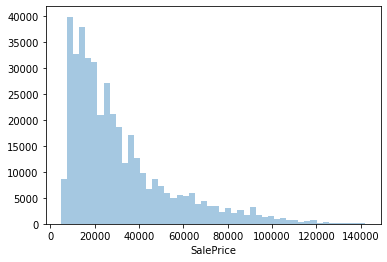

In [9]:
sns.distplot(a=df["SalePrice"], kde=False);

Most of the sale price is below 20,000$

*Plot Sale Date vs Sale Price*

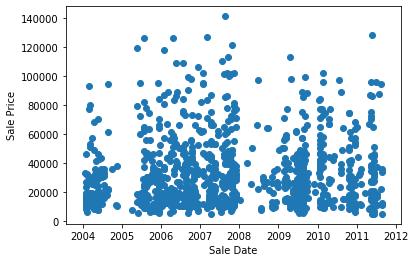

In [10]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.xlabel('Sale Date')
plt.ylabel('Sale Price');

Decrease of sales in some time periods (i.e. 2005, 2008)

#### 5.1.4 Feature engineering

In [11]:
# Load train and validation set separately, specifing the column containing the date (time series)
df_train = pd.read_csv("../Data/bluebook-for-bulldozers/Train.csv", 
                 low_memory=False, 
                 parse_dates=["saledate"])
df_valid = pd.read_csv("../Data/bluebook-for-bulldozers/Valid.csv", 
                 low_memory=False, 
                 parse_dates=["saledate"])

In [12]:
df_train.shape, df_valid.shape

((401125, 53), (11573, 52))

In [13]:
round(len(df_valid)/(len(df_valid)+len(df_train))*100, 2)

2.8

The validation set is ~3% of the total data

*Create function for the processing of the saledate column:*

* Sort value by saledate
* Split the column into:
  * Year
  * Month
  * Day
  * Day of the week
  * Day of the year

The function will be used for validation and test data as well.

In [87]:
def date_processing(df):
    """
    Feature engineering for the data column: creation of Year, Month, Day, Day of week and day of year column.
    """
    # Sorting values by Sale Date - removed for processing validation data
    #df.sort_values(by=['saledate'], inplace=True, ascending=True)
    
    #Split sale data into year, month, day, day of week, day of year
    df['saleYear'] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayOfWeek'] = df.saledate.dt.dayofweek
    df['saleDayOfYear'] = df.saledate.dt.dayofyear
    
    # Remove saledate column (info in the new columns)
    df.drop("saledate", axis=1, inplace=True)
    
    return df

*Process train data*

In [15]:
date_processing(df_train)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,416,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,12G,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,644,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,13500,1799594,4102,149,2.0,1000,NaN,NaN,D4C,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2011,12,30,4,364
397987,6288376,9750,1872596,4875,149,2.0,1000,NaN,NaN,520C,...,NaN,NaN,NaN,Standard,Conventional,2011,12,30,4,364
392664,6258093,14500,1877553,3170,149,2.0,1988,NaN,NaN,580K,...,NaN,NaN,NaN,NaN,NaN,2011,12,30,4,364
400458,6315563,12500,1869637,26456,149,2.0,2010,NaN,NaN,L160,...,NaN,NaN,NaN,Standard,Conventional,2011,12,30,4,364


*Check column values*

In [16]:
df_train.state.value_counts()

Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska        

### 5.2 Data preprocessing 

Testing separately preprocessing for numerical values and categorical values, then combining them into a function.

In [19]:
# Create X and y
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train.SalePrice

In [20]:
X_train.shape, y_train.shape

((401125, 56), (401125,))

In [24]:
# Make a copy of the df for testing
X_train_cp = X_train.copy()
X_train_cp.shape

(401125, 56)

#### 5.2.1 Numerical variables

In [21]:
# Identify numerical columns 
num_columns = [label for label, content in X_train.items() if pd.api.types.is_numeric_dtype(content)]
num_columns

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleDayOfWeek',
 'saleDayOfYear']

In [22]:
# Check for missing numerical values
X_train[num_columns].isna().sum()

SalesID                          0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
saleYear                         0
saleMonth                        0
saleDay                          0
saleDayOfWeek                    0
saleDayOfYear                    0
dtype: int64

In [68]:
for cname in num_columns:
    if X_train_cp[cname].isnull().sum():
        # Add binary column to indicate if value was missing
        X_train_cp[cname+'_is_missing'] = X_train_cp[cname].isnull()
        # Fill missing numerical values with median
        X_train_cp[cname] = X_train_cp[cname].fillna(X_train_cp[cname].median())

In [48]:
X_train_cp.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,auctioneerID_is_missing,MachineHoursCurrentMeter_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,NaN,TD20,TD20,...,None or Unspecified,NaN,NaN,1989,1,17,1,17,False,True
92803,1404019,1169900,7110,132,99.0,1986,0.0,NaN,416,416,...,NaN,NaN,NaN,1989,1,31,1,31,False,True
98346,1415646,1262088,3357,132,99.0,1975,0.0,NaN,12G,12,...,NaN,NaN,NaN,1989,1,31,1,31,False,True
169297,1596358,1433229,8247,132,99.0,1978,0.0,NaN,644,644,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True
274835,1821514,1194089,10150,132,99.0,1980,0.0,NaN,A66,A66,...,NaN,Standard,Conventional,1989,1,31,1,31,False,True


In [49]:
X_train_cp[num_columns].isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
saleYear                    0
saleMonth                   0
saleDay                     0
saleDayOfWeek               0
saleDayOfYear               0
dtype: int64

#### 5.2.2 Categorical values

In [50]:
# Identify categorical columns 
cat_columns = [label for label, content in X_train.items() if not pd.api.types.is_numeric_dtype(content)]
cat_columns

['UsageBand',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls']

In [51]:
# Check for missing categorical values
X_train[cat_columns].isna().sum()

UsageBand                  331486
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc            137191
fiModelSeries              344217
fiModelDescriptor          329206
ProductSize                210775
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System               296764
Enclosure                     325
Forks                      209048
Pad_Type                   321991
Ride_Control               252519
Stick                      321991
Transmission               217895
Turbocharged               321991
Blade_Extension            375906
Blade_Width                375906
Enclosure_Type             375906
Engine_Horsepower          375906
Hydraulics                  80555
Pushblock                  375906
Ripper                     296988
Scarifier                  375895
Tip_Control                375906
Tire_Size                  306407
Coupler       

In [52]:
# Check dtype of categorical columns
X_train[cat_columns].dtypes

UsageBand                  object
fiModelDesc                object
fiBaseModel                object
fiSecondaryDesc            object
fiModelSeries              object
fiModelDescriptor          object
ProductSize                object
fiProductClassDesc         object
state                      object
ProductGroup               object
ProductGroupDesc           object
Drive_System               object
Enclosure                  object
Forks                      object
Pad_Type                   object
Ride_Control               object
Stick                      object
Transmission               object
Turbocharged               object
Blade_Extension            object
Blade_Width                object
Enclosure_Type             object
Engine_Horsepower          object
Hydraulics                 object
Pushblock                  object
Ripper                     object
Scarifier                  object
Tip_Control                object
Tire_Size                  object
Coupler       

In [53]:
# Check the number of unique values
X_train[cat_columns].nunique()

UsageBand                     3
fiModelDesc                4999
fiBaseModel                1950
fiSecondaryDesc             175
fiModelSeries               122
fiModelDescriptor           139
ProductSize                   6
fiProductClassDesc           74
state                        53
ProductGroup                  6
ProductGroupDesc              6
Drive_System                  4
Enclosure                     6
Forks                         2
Pad_Type                      4
Ride_Control                  3
Stick                         2
Transmission                  8
Turbocharged                  2
Blade_Extension               2
Blade_Width                   6
Enclosure_Type                3
Engine_Horsepower             2
Hydraulics                   12
Pushblock                     2
Ripper                        4
Scarifier                     2
Tip_Control                   3
Tire_Size                    17
Coupler                       3
Coupler_System                2
Grouser_

In [69]:
for cname in cat_columns:
    # Add binary column to indicate missing value
    X_train_cp[cname+'_is_missing'] = X_train_cp[cname].isnull()
    # Convert into categories and add 1 to make missing value = 0
    X_train_cp[cname] = pd.Categorical(X_train_cp[cname]).codes+1

In [65]:
X_train_cp.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4537,1735,...,True,True,True,True,True,False,False,False,True,True
92803,1404019,1169900,7110,132,99.0,1986,0.0,0,735,243,...,True,True,True,True,True,True,True,True,True,True
98346,1415646,1262088,3357,132,99.0,1975,0.0,0,82,19,...,True,True,True,True,True,True,True,True,True,True
169297,1596358,1433229,8247,132,99.0,1978,0.0,0,1158,349,...,True,True,True,True,True,True,True,True,False,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1800,557,...,True,True,True,True,True,True,True,True,False,False


In [66]:
X_train_cp.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [67]:
X_train_cp[cat_columns].dtypes

UsageBand                   int8
fiModelDesc                int16
fiBaseModel                int16
fiSecondaryDesc            int16
fiModelSeries               int8
fiModelDescriptor          int16
ProductSize                 int8
fiProductClassDesc          int8
state                       int8
ProductGroup                int8
ProductGroupDesc            int8
Drive_System                int8
Enclosure                   int8
Forks                       int8
Pad_Type                    int8
Ride_Control                int8
Stick                       int8
Transmission                int8
Turbocharged                int8
Blade_Extension             int8
Blade_Width                 int8
Enclosure_Type              int8
Engine_Horsepower           int8
Hydraulics                  int8
Pushblock                   int8
Ripper                      int8
Scarifier                   int8
Tip_Control                 int8
Tire_Size                   int8
Coupler                     int8
Coupler_Sy

No more missing values are present and all categorical values have been converted into numbers

#### 5.2.3 Function

Combining the two preprocessing steps into a function

In [70]:
def df_preprocessing(df, num_cols, cat_cols):
    """
    Preprocessing the database: 
    * Fill numerical columns with the median
    * Convert categorical columns in categories
    * Add one to make the missing values = 0
    * Add binary columns to indicate if the value was missing
    """
    
    # Numerical values
    for cname in num_columns:
        if df[cname].isnull().sum():
            # Add binary column to indicate if value was missing
            df[cname+'_is_missing'] = df[cname].isnull()
            # Fill missing numerical values with median
            df[cname] = df[cname].fillna(df[cname].median())
    
    # Categorical values
    for cname in cat_columns:
        # Add binary column to indicate missing value
        df[cname+'_is_missing'] = df[cname].isnull()
        # Convert into categories and add 1 to make missing value = 0
        df[cname] = pd.Categorical(df[cname]).codes+1
    
    return df

In [71]:
df_preprocessing(X_train, num_columns, cat_columns)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
205615,1646770,1126363,8434,132,18.0,1974,0.0,0,4537,1735,...,True,True,True,True,True,False,False,False,True,True
92803,1404019,1169900,7110,132,99.0,1986,0.0,0,735,243,...,True,True,True,True,True,True,True,True,True,True
98346,1415646,1262088,3357,132,99.0,1975,0.0,0,82,19,...,True,True,True,True,True,True,True,True,True,True
169297,1596358,1433229,8247,132,99.0,1978,0.0,0,1158,349,...,True,True,True,True,True,True,True,True,False,False
274835,1821514,1194089,10150,132,99.0,1980,0.0,0,1800,557,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393123,6260878,1799594,4102,149,2.0,1000,0.0,0,2137,690,...,True,True,True,True,True,False,False,False,True,True
397987,6288376,1872596,4875,149,2.0,1000,0.0,0,945,295,...,True,True,True,True,True,True,True,True,False,False
392664,6258093,1877553,3170,149,2.0,1988,0.0,0,1057,324,...,True,True,True,True,True,True,True,True,True,True
400458,6315563,1869637,26456,149,2.0,2010,0.0,0,3267,1130,...,True,True,True,True,True,True,True,True,False,False


In [72]:
X_train.shape

(401125, 102)

In [73]:
X_train.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 102, dtype: int64

In [74]:
X_train.dtypes

SalesID                           int64
MachineID                         int64
ModelID                           int64
datasource                        int64
auctioneerID                    float64
                                 ...   
Backhoe_Mounting_is_missing        bool
Blade_Type_is_missing              bool
Travel_Controls_is_missing         bool
Differential_Type_is_missing       bool
Steering_Controls_is_missing       bool
Length: 102, dtype: object

No missing values are present and all categorical values have been converted into numbers, the data frame is now ready for fitting.

### 5.3 Model fitting

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1)

# Fit the model
model.fit(X_train, y_train)

CPU times: user 28min 58s, sys: 15.2 s, total: 29min 13s
Wall time: 7min 45s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

### 5.4 Model evaluation

#### 5.4.1 Score

Use validation data to score the model:
* Split into X and y
* Process date
* Preprocess categorical and missing values
* Check the score of the model

*Split into X and y*

In [77]:
df_valid.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1222837,902859,1376,121,3,1000,0.0,NaN,2012-01-05,375L,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,2012-01-05,TX300LC2,...,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN
2,1222841,999308,4587,121,3,2000,10127.0,Medium,2012-01-05,270LC,...,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1222843,1062425,1954,121,3,1000,4682.0,Low,2012-01-05,892DLC,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,2012-01-04,544H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [84]:
df_valid.shape

(11573, 52)

In [96]:
X_valid = df_valid.copy()
X_valid.shape

(11573, 52)

In the valid database the SalePrice column is not present, it is stored in the ValidSolution.csv and needs to be imported separately.

In [88]:
valid_solution = pd.read_csv("../Data/bluebook-for-bulldozers/ValidSolution.csv")
valid_solution.shape

(11573, 3)

In [89]:
valid_solution.head()

,SalesID,SalePrice,Usage
0,1222837,31000.0,PublicTest
1,1222839,54000.0,PublicTest
2,1222841,26500.0,PublicTest
3,1222843,10000.0,PublicTest
4,1222845,35000.0,PublicTest


In [91]:
y_valid = valid_solution.SalePrice
y_valid.shape

(11573,)

In [92]:
y_valid.head()

0    31000.0
1    54000.0
2    26500.0
3    10000.0
4    35000.0
Name: SalePrice, dtype: float64

*Date processing*

In [98]:
date_processing(X_valid)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1222837,902859,1376,121,3,1000,0.0,NaN,375L,375,...,NaN,NaN,NaN,NaN,NaN,2012,1,5,3,5
1,1222839,1048320,36526,121,3,2006,4412.0,Medium,TX300LC2,TX300,...,NaN,NaN,NaN,NaN,NaN,2012,1,5,3,5
2,1222841,999308,4587,121,3,2000,10127.0,Medium,270LC,270,...,NaN,NaN,NaN,NaN,NaN,2012,1,5,3,5
3,1222843,1062425,1954,121,3,1000,4682.0,Low,892DLC,892,...,NaN,NaN,NaN,NaN,NaN,2012,1,5,3,5
4,1222845,1032841,4701,121,3,2002,8150.0,Medium,544H,544,...,NaN,NaN,NaN,Standard,Conventional,2012,1,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,NaN,NaN,30NX,30,...,NaN,NaN,NaN,NaN,NaN,2012,3,7,2,67
11569,6333345,1882122,21436,149,2,2005,NaN,NaN,30NX2,30,...,NaN,NaN,NaN,NaN,NaN,2012,1,28,5,28
11570,6333347,1944213,21435,149,2,2005,NaN,NaN,30NX,30,...,NaN,NaN,NaN,NaN,NaN,2012,1,28,5,28
11571,6333348,1794518,21435,149,2,2006,NaN,NaN,30NX,30,...,NaN,NaN,NaN,NaN,NaN,2012,3,7,2,67


In [99]:
X_valid.shape

(11573, 56)

*Preprocessing categorical and missing values*

In [100]:
df_preprocessing(X_valid, num_columns, cat_columns)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1222837,902859,1376,121,3,1000,0.0,0,294,122,...,False,False,False,False,False,True,True,True,True,True
1,1222839,1048320,36526,121,3,2006,4412.0,3,1612,728,...,False,False,False,False,False,True,True,True,True,True
2,1222841,999308,4587,121,3,2000,10127.0,3,161,75,...,False,False,False,False,False,True,True,True,True,True
3,1222843,1062425,1954,121,3,1000,4682.0,2,687,248,...,False,False,False,False,False,True,True,True,True,True
4,1222845,1032841,4701,121,3,2002,8150.0,3,398,156,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11568,6333344,1919201,21435,149,2,2005,3786.0,0,196,83,...,False,False,False,False,False,True,True,True,True,True
11569,6333345,1882122,21436,149,2,2005,3786.0,0,197,83,...,False,False,False,False,False,True,True,True,True,True
11570,6333347,1944213,21435,149,2,2005,3786.0,0,196,83,...,False,False,False,False,False,True,True,True,True,True
11571,6333348,1794518,21435,149,2,2006,3786.0,0,196,83,...,False,False,False,False,False,True,True,True,True,True


In [101]:
X_valid.shape

(11573, 101)

In [102]:
X_valid.dtypes

SalesID                         int64
MachineID                       int64
ModelID                         int64
datasource                      int64
auctioneerID                    int64
                                ...  
Backhoe_Mounting_is_missing      bool
Blade_Type_is_missing            bool
Travel_Controls_is_missing       bool
Differential_Type_is_missing     bool
Steering_Controls_is_missing     bool
Length: 101, dtype: object

No missing values are present and all the columns have been converted into numbers. The df is ready for the model evaluation. 

*Model score*

In [105]:
# Check if the train and validation set have the same columns 
set(X_train.columns) - set(X_valid.columns)

{'auctioneerID_is_missing'}

`auctioneerID_is_missing` is not present in the validation data frame, it needs to be added as the df needs to have the same shape of the df used to train the model

In [107]:
# Manually adding the missing column 
X_valid['auctioneerID_is_missing'] = False
X_valid.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1222837,902859,1376,121,3,1000,0.0,0,294,122,...,False,False,False,False,True,True,True,True,True,False
1,1222839,1048320,36526,121,3,2006,4412.0,3,1612,728,...,False,False,False,False,True,True,True,True,True,False
2,1222841,999308,4587,121,3,2000,10127.0,3,161,75,...,False,False,False,False,True,True,True,True,True,False
3,1222843,1062425,1954,121,3,1000,4682.0,2,687,248,...,False,False,False,False,True,True,True,True,True,False
4,1222845,1032841,4701,121,3,2002,8150.0,3,398,156,...,True,True,True,True,True,True,True,False,False,False


In [108]:
X_train.shape, X_valid.shape

((401125, 102), (11573, 102))

In [109]:
# Score the model
model.score(X_valid, y_valid)

0.4984500759672984

The score function uses the coefficient of determination R2 of the predictions. The competitions requested RMSLE, create custom function to evaluate it. 

#### 5.4.2 RMSLE

In [118]:
from sklearn.metrics import mean_squared_log_error

In [111]:
def rmsle(y_test, y_preds):
    """
    Calculate root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

In [113]:
# Generate predictions on validation data
valid_preds = model.predict(X_valid)

In [114]:
rmsle(y_valid, valid_preds)

0.48724297917225273

#### 5.4.2 Other evaluation metrics

Define a function to analyse the following parameters to evaluate model performance: 
* Mean Absolute Error (MAE)
* Root Square Mean Log Error (RSMLE)
* R^2

In [119]:
from sklearn.metrics import mean_absolute_error, r2_score

In [116]:
def show_scores(model, X, y):
    preds = model.predict(X)
    scores = {"MAE: ": mean_absolute_error(y, preds), 
              "RMSLE: ": rmsle(y, preds), 
              "R^2: ": r2_score(y, preds)}
    return scores

In [120]:
show_scores(model, X_valid, y_valid)

{'MAE: ': 10942.886973991188,
 'RMSLE: ': 0.48724297917225273,
 'R^2: ': 0.4984500759672984}

## 6. Experimentation

Test the model on a subset of parameters to reduce the computational time for hyperparameter tuning

In [131]:
# Re-instantiate the model changing the max sample value
model = RandomForestRegressor(n_jobs=-1, 
                             max_samples=10000)

*Fit the model with 10,000 samples*

In [132]:
%%time
model.fit(X_train, y_train)

CPU times: user 57 s, sys: 1.7 s, total: 58.7 s
Wall time: 19.6 s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=10000, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [133]:
# Score the model
show_scores(model, X_valid, y_valid)

{'MAE: ': 9857.85561047265,
 'RMSLE: ': 0.3960390906636857,
 'R^2: ': 0.6554064665478102}


### 6.1 Hyperparameter tuning

Tuning of the hyperparameters using RandomizedSearchCV

In [127]:
from sklearn.model_selection import RandomizedSearchCV

In [136]:
# Define parameters grid
rf_grid = {"n_estimators": np.arange(10, 100, 10), 
           "max_depth": [None, 3, 5, 10], 
           "min_samples_split": np.arange(2, 20, 2), 
           "min_samples_leaf": np.arange(1, 20, 2), 
           "max_features": [0.5, 1, "sqrt", "auto"], 
           "max_samples": [10000]}

In [150]:
# Instantiate RandomisedSearchCV
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1), 
                              param_distributions=rf_grid, 
                              n_iter=20, 
                              cv=5)

In [151]:
%%time
# Fit the model
rs_model.fit(X_train, y_train)

CPU times: user 6min 6s, sys: 1min 23s, total: 7min 30s
Wall time: 17min 51s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100, n_jobs=-1,
                   

In [152]:
# Identify the best parameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': None}

In [153]:
# Evaluate the model
show_scores(rs_model, X_valid, y_valid)

{'MAE: ': 10182.57497850315,
 'RMSLE: ': 0.4067504712579399,
 'R^2: ': 0.6367612282003383}

The model perform worse as only 10 iterations have been performed. Use the best parameters identified to train the model. 

*Train the new model*

In [164]:
# Best parameters identified
new_model = RandomForestRegressor(n_estimators=30, 
                                  min_samples_split=8, 
                                  min_samples_leaf=1, 
                                  max_features='auto', 
                                  n_jobs=-1, 
                                  max_samples=None)

In [165]:
%%time
# Fit the model
new_model.fit(X_train, y_train)

CPU times: user 7min 9s, sys: 3.6 s, total: 7min 13s
Wall time: 1min 59s


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [167]:
# Score the model
show_scores(new_model, X_valid, y_valid)

{'MAE: ': 11030.18466836543,
 'RMSLE: ': 0.4912011424678234,
 'R^2: ': 0.4907091579332514}

No improvement has been observed to the model, since only 20 iterations have been used for computational time constraints. 

### 6.2 Make predictions 

Make predictions on test data and submit the results to kaggle 

In [181]:
# Import the data
df_test = pd.read_csv("../Data/bluebook-for-bulldozers/Test.csv", 
                      parse_dates=['saledate'])
df_test.shape

(12457, 52)

In [182]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [183]:
# Create a copy of the df
X_test = df_test.copy()

In [184]:
date_processing(X_test)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1227829,1006309,3168,121,3,1999,3688.0,Low,580G,580,...,NaN,NaN,NaN,NaN,NaN,2012,5,3,3,124
1,1227844,1022817,7271,121,3,1000,28555.0,High,936,936,...,NaN,NaN,NaN,Standard,Conventional,2012,5,10,3,131
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,EC210BLC,EC210,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
3,1227848,56204,1269,121,3,2006,8940.0,High,330CL,330,...,NaN,NaN,NaN,NaN,NaN,2012,5,10,3,131
4,1227863,1053887,22312,121,3,2005,2286.0,Low,650K,650,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,2012,5,10,3,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,NaN,NaN,80NX3,80,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12453,6643173,2558332,21434,149,2,2005,NaN,NaN,28N,28,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12454,6643184,2558342,21437,149,2,1000,NaN,NaN,35N,35,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298
12455,6643186,2558343,21437,149,2,2006,NaN,NaN,35N,35,...,NaN,NaN,NaN,NaN,NaN,2012,10,24,2,298


In [185]:
# Preprocess the df
df_preprocessing(X_test, num_columns, cat_columns)

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12452,6643171,2558317,21450,149,2,2008,3525.0,0,713,235,...,False,False,False,False,False,True,True,True,True,True
12453,6643173,2558332,21434,149,2,2005,3525.0,0,186,80,...,False,False,False,False,False,True,True,True,True,True
12454,6643184,2558342,21437,149,2,1000,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True
12455,6643186,2558343,21437,149,2,2006,3525.0,0,325,123,...,False,False,False,False,False,True,True,True,True,True


In [186]:
# Check that the test df has the same columns as the train df
set(X_train.columns) - set(X_test.columns)

{'auctioneerID_is_missing'}

The column `auctioneerID_is_missing` is not present in the test data frame. It will be added manually. 

In [187]:
X_test['auctioneerID_is_missing'] = False
X_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


In [188]:
# Make predictions using the test data
test_preds = new_model.predict(X_test)

In [189]:
len(test_preds)

12457

In [190]:
# Format the results as per Kaggle requirements
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test['SalesID']
df_preds['SalesPrice'] = test_preds
df_preds.head()

,SalesID,SalesPrice
0,1227829,21631.960262
1,1227844,19202.234728
2,1227847,48574.860510
3,1227848,86099.209448
4,1227863,41517.314306


In [191]:
# Export prediction data
df_preds.to_csv('../Data/Test_preds.cvs')

### 6.3 Feature importance

Identify which attributes were the most important in predictiong the Sale Price. 

In [197]:
new_model.feature_importances_ 

array([4.85039291e-02, 1.44979415e-02, 3.27268962e-02, 2.59773894e-04,
       3.79814106e-03, 2.66331348e-01, 2.74567762e-03, 9.48584984e-04,
       1.94013625e-02, 8.30360641e-02, 5.15138438e-02, 4.48471804e-03,
       3.12124282e-03, 2.30872547e-01, 4.07052746e-02, 7.51525649e-03,
       9.21447255e-05, 1.53319373e-04, 1.73074699e-03, 9.29039722e-03,
       3.67673017e-04, 2.91015329e-05, 5.10017321e-04, 1.63931343e-04,
       1.45974980e-03, 2.04241240e-05, 3.54206947e-05, 5.31891688e-03,
       1.45187615e-04, 5.56226059e-04, 4.75999780e-03, 1.91568487e-03,
       2.04438416e-03, 2.73108968e-03, 1.99145733e-04, 1.44932767e-03,
       8.49772321e-04, 1.12572406e-02, 7.50375996e-06, 4.32662633e-06,
       1.79199151e-04, 1.01050825e-03, 1.17979663e-03, 6.27955382e-04,
       2.06698417e-04, 3.92407630e-04, 2.27349489e-04, 1.63357469e-03,
       7.93419934e-04, 1.31595329e-04, 1.72923044e-04, 7.65641120e-02,
       2.36390074e-03, 7.65419459e-03, 3.67049674e-03, 1.35503157e-02,
      

*Define a function to plot the feature importances*

In [200]:
def plot_features (columns, model, n=20):
    """
    Generate and plot feature importances for a given model. 
    The function has three different steps: 
    1. Generation of importances
    2. Create a dataframe with the importances
    3. Plot the importances
    """
    # Generate importances
    importances = model.feature_importances_
    
    # Put importances in a dataframe
    df=(pd.DataFrame({"features": columns, 
                      "feature_importances": importances})
        .sort_values("feature_importances", ascending=False)
        .reset_index(drop=True))
    
    # Plot the importance dataframe
    sns.barplot(y=df.features[:n], 
                x=df.feature_importances[:n], 
                orient='h')
    plt.xlabel("Feature importance")
    plt.ylabel("Importance")
    plt.title("Feature importance plot")

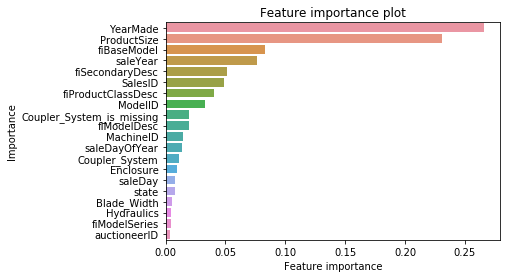

In [201]:
# Plot the importances
plot_features(X_train.columns, new_model)

The three features that have the greater impact on predicting the Sale price are: 
* YearMade
* ProductSize
* fitBaseModel

### 6.5 Next steps

Some possible next steps to improve the model: 
* Increase the number of iteration for the RandomizedSerachCV and further hyperparameter optimisation
* Test other machine learning models
* Feature engineering and using feature importance to select the feature to be tested